## Importing Libraries

In [1]:
# import warnings
import warnings
warnings.filterwarnings("ignore")

In [2]:

import numpy as np
import pandas as pd
pd.set_option('display.max_columns', 300)

import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
sns.set_style("darkgrid")

from sklearn.model_selection import train_test_split

from sklearn.preprocessing import MinMaxScaler


from sklearn.model_selection import GridSearchCV

from sklearn.metrics import plot_roc_curve

from sklearn.ensemble import RandomForestClassifier


from sklearn import metrics


from sklearn.metrics import precision_recall_fscore_support as score

import xgboost as xgb


## Reading and Inspecting Data

### Training Dataset

In [3]:
df = pd.read_csv("train.csv", sep = ",", encoding = "ISO-8859-1", header = 0)
df.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,0
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,0,60,0
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50,0
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,0,50,0
4,48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,0,73,0


In [4]:
df.tail()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
54803,3030,Technology,region_14,Bachelor's,m,sourcing,1,48,3.0,17,0,0,78,0
54804,74592,Operations,region_27,Master's & above,f,other,1,37,2.0,6,0,0,56,0
54805,13918,Analytics,region_1,Bachelor's,m,other,1,27,5.0,3,1,0,79,0
54806,13614,Sales & Marketing,region_9,NaN,m,sourcing,1,29,1.0,2,0,0,45,0
54807,51526,HR,region_22,Bachelor's,m,other,1,27,1.0,5,0,0,49,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54808 entries, 0 to 54807
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   employee_id           54808 non-null  int64  
 1   department            54808 non-null  object 
 2   region                54808 non-null  object 
 3   education             52399 non-null  object 
 4   gender                54808 non-null  object 
 5   recruitment_channel   54808 non-null  object 
 6   no_of_trainings       54808 non-null  int64  
 7   age                   54808 non-null  int64  
 8   previous_year_rating  50684 non-null  float64
 9   length_of_service     54808 non-null  int64  
 10  KPIs_met >80%         54808 non-null  int64  
 11  awards_won?           54808 non-null  int64  
 12  avg_training_score    54808 non-null  int64  
 13  is_promoted           54808 non-null  int64  
dtypes: float64(1), int64(8), object(5)
memory usage: 5.9+ MB


In [6]:
df.describe()

,employee_id,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
count,54808.000000,54808.000000,54808.000000,50684.000000,54808.000000,54808.000000,54808.000000,54808.000000,54808.000000
mean,39195.830627,1.253011,34.803915,3.329256,5.865512,0.351974,0.023172,63.386750,0.085170
std,22586.581449,0.609264,7.660169,1.259993,4.265094,0.477590,0.150450,13.371559,0.279137
min,1.000000,1.000000,20.000000,1.000000,1.000000,0.000000,0.000000,39.000000,0.000000
25%,19669.750000,1.000000,29.000000,3.000000,3.000000,0.000000,0.000000,51.000000,0.000000
50%,39225.500000,1.000000,33.000000,3.000000,5.000000,0.000000,0.000000,60.000000,0.000000
75%,58730.500000,1.000000,39.000000,4.000000,7.000000,1.000000,0.000000,76.000000,0.000000
max,78298.000000,10.000000,60.000000,5.000000,37.000000,1.000000,1.000000,99.000000,1.000000


In [7]:
df.shape

(54808, 14)

### Test Dataset

In [8]:
df_test = pd.read_csv("test.csv", sep = ",", encoding = "ISO-8859-1", header = 0)
df_test.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score
0,8724,Technology,region_26,Bachelor's,m,sourcing,1,24,NaN,1,1,0,77
1,74430,HR,region_4,Bachelor's,f,other,1,31,3.0,5,0,0,51
2,72255,Sales & Marketing,region_13,Bachelor's,m,other,1,31,1.0,4,0,0,47
3,38562,Procurement,region_2,Bachelor's,f,other,3,31,2.0,9,0,0,65
4,64486,Finance,region_29,Bachelor's,m,sourcing,1,30,4.0,7,0,0,61


In [9]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23490 entries, 0 to 23489
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   employee_id           23490 non-null  int64  
 1   department            23490 non-null  object 
 2   region                23490 non-null  object 
 3   education             22456 non-null  object 
 4   gender                23490 non-null  object 
 5   recruitment_channel   23490 non-null  object 
 6   no_of_trainings       23490 non-null  int64  
 7   age                   23490 non-null  int64  
 8   previous_year_rating  21678 non-null  float64
 9   length_of_service     23490 non-null  int64  
 10  KPIs_met >80%         23490 non-null  int64  
 11  awards_won?           23490 non-null  int64  
 12  avg_training_score    23490 non-null  int64  
dtypes: float64(1), int64(7), object(5)
memory usage: 2.3+ MB


## EDA & Data Cleaning

Creating a function for univariate anaylsis

In [10]:
def valCounts(col):
    df.groupby([col, "is_promoted"])[col].count().unstack().plot(kind = "bar", figsize = (20,5), stacked = True)
    plt.xticks(rotation='horizontal')
    plt.show()

In [11]:
# Dropping employee_id since its a unique value for each employee and hence not important for our analysis

df.drop("employee_id", axis = 1, inplace = True)

EDA and Data Cleaning on the training dataset and reflecting the same data cleaning to the test dataset

### Feature - Department

In [12]:
df["department"].isnull().sum()

0

<AxesSubplot:>

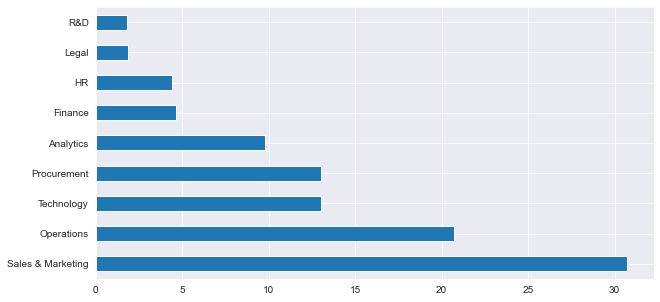

In [13]:
(df["department"].value_counts(normalize = True)*100).plot(kind = "barh", figsize = (10,5))

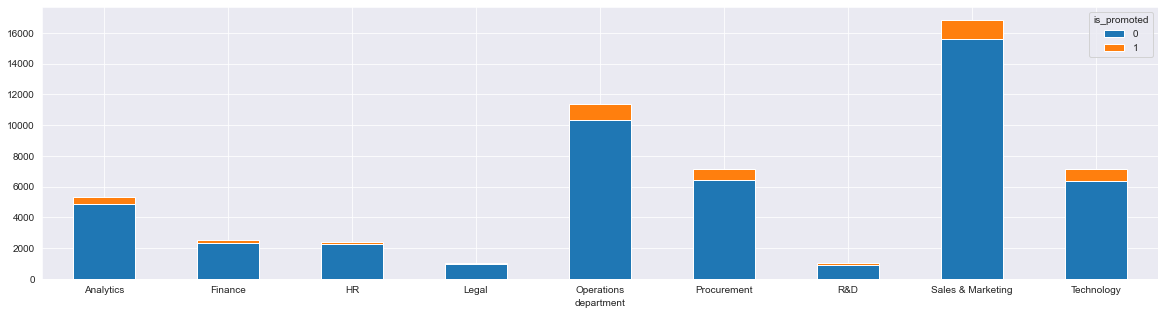

In [14]:
valCounts("department")

Legal, R&D, HR and Finance departments have next to no promotions in the company, whereas Sales & Marketing and Operations Department have the most promoted employees.

Checking null values - Test Set

In [15]:
df_test.department.isnull().sum()

0

### Department - Region

In [16]:
df["region"].isnull().sum()

0

In [17]:
df["region"].value_counts(normalize = True) * 100

region_2     22.520435
region_22    11.728215
region_7      8.836301
region_15     5.123340
region_13     4.831411
region_26     4.123486
region_31     3.530506
region_4      3.107211
region_27     3.026930
region_16     2.672967
region_28     2.404758
region_11     2.399285
region_23     2.143848
region_29     1.813604
region_32     1.724201
region_19     1.594658
region_20     1.550868
region_14     1.508904
region_25     1.494307
region_17     1.452343
region_5      1.397606
region_6      1.258940
region_30     1.198730
region_8      1.195081
region_10     1.182309
region_1      1.112976
region_24     0.926872
region_12     0.912276
region_9      0.766311
region_21     0.749891
region_3      0.631295
region_34     0.532769
region_33     0.490804
region_18     0.056561
Name: region, dtype: float64

<AxesSubplot:ylabel='region'>

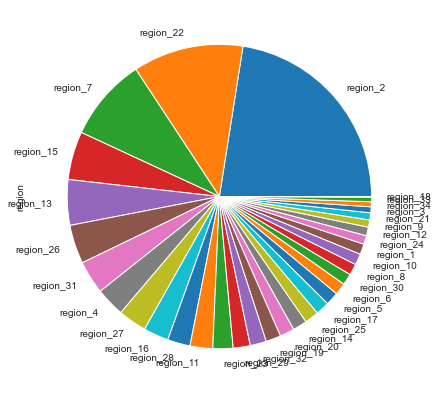

In [18]:
(df["region"].value_counts(normalize = True) * 100).plot.pie(figsize = (7,7))

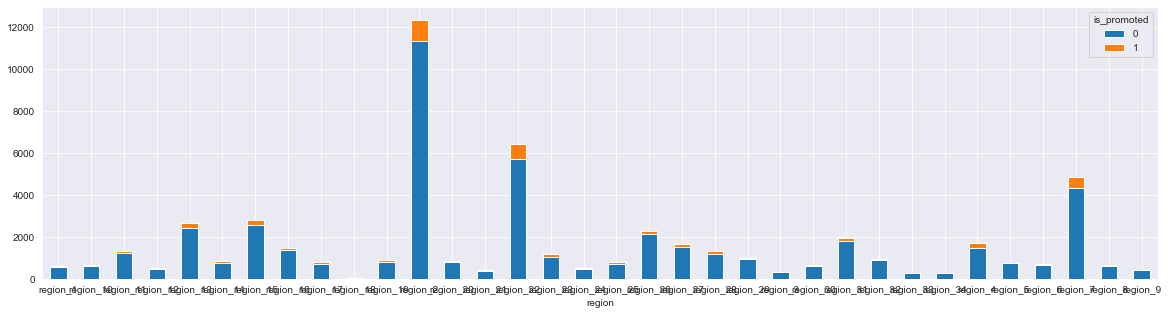

In [19]:
valCounts("region")

Checking null values - Test Set

In [20]:
df_test.region.isnull().sum()

0

### Feature - Education

In [21]:
df["education"].isnull().sum()

2409

In [22]:
df["education"].value_counts(normalize = True) * 100

Bachelor's          69.980343
Master's & above    28.483368
Below Secondary      1.536289
Name: education, dtype: float64

Imputing the missing values to Bachelor's since that's the mode. Combining the other qualifications to the group "Other" since they exist in much lower quantity compared to Bachelor's

1. Bachelor's

2. Others (Master's & above, Below Secondary and missing values)

In [23]:
df["education"].fillna("Bachelor's", inplace = True)
df["education"] = df["education"].apply(lambda x: x if x == "Bachelor's" else "Others")
df["education"].value_counts(normalize = True) * 100

Bachelor's    71.29981
Others        28.70019
Name: education, dtype: float64

<AxesSubplot:ylabel='education'>

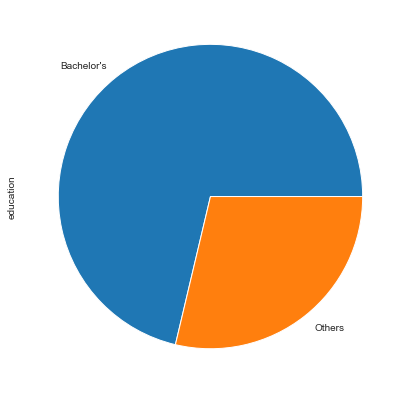

In [24]:
(df["education"].value_counts(normalize = True) * 100).plot.pie(figsize = (7,7))

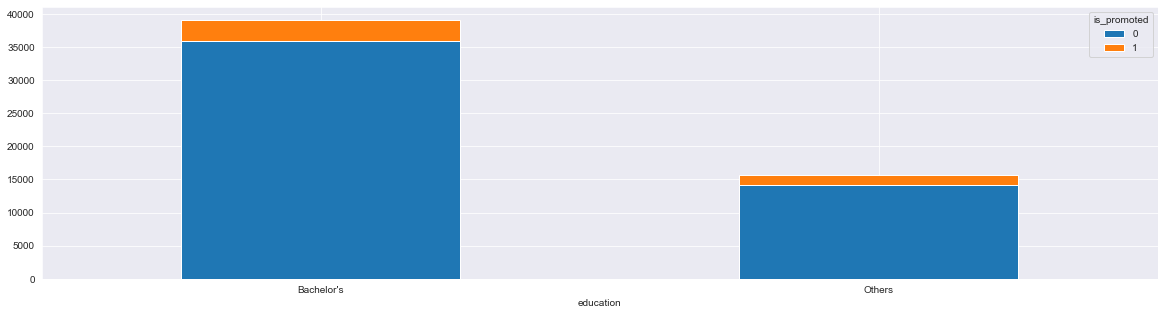

In [25]:
valCounts("education")

Checking null values - Test Set

In [26]:
df_test.education.isnull().sum()

1034

Just like for training dataset, imputing the null values with "Bachelor's" and combining the other values to the group "Others"

In [27]:
df_test["education"].fillna("Bachelor's", inplace = True)
df_test["education"] = df_test["education"].apply(lambda x: x if x == "Bachelor's" else "Others")
df_test["education"].value_counts()

Bachelor's    16612
Others         6878
Name: education, dtype: int64

### Feature - Gender

In [28]:
df["gender"].isnull().sum()

0

<AxesSubplot:ylabel='gender'>

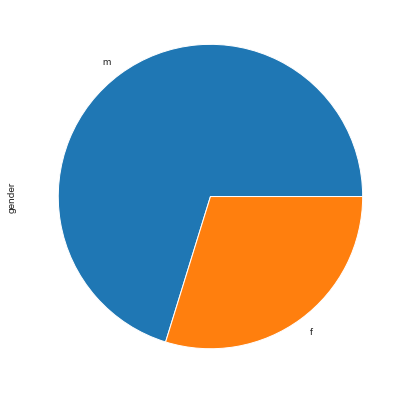

In [29]:
(df["gender"].value_counts(normalize = True) * 100).plot(kind = "pie", figsize = (7,7))

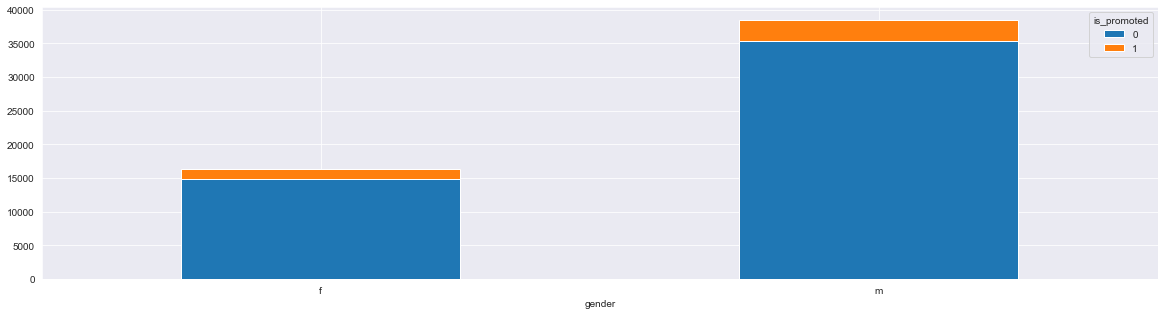

In [30]:
valCounts("gender")

Checking null values - Test Set

In [31]:
df_test.gender.isnull().sum()

0

### Feature - Recruitment Channel

In [32]:
df["recruitment_channel"].isnull().sum()

0

<AxesSubplot:>

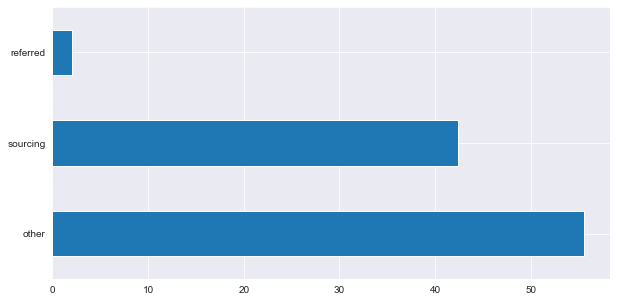

In [33]:
(df["recruitment_channel"].value_counts(normalize = True) * 100).plot(kind = "barh", figsize = (10,5))

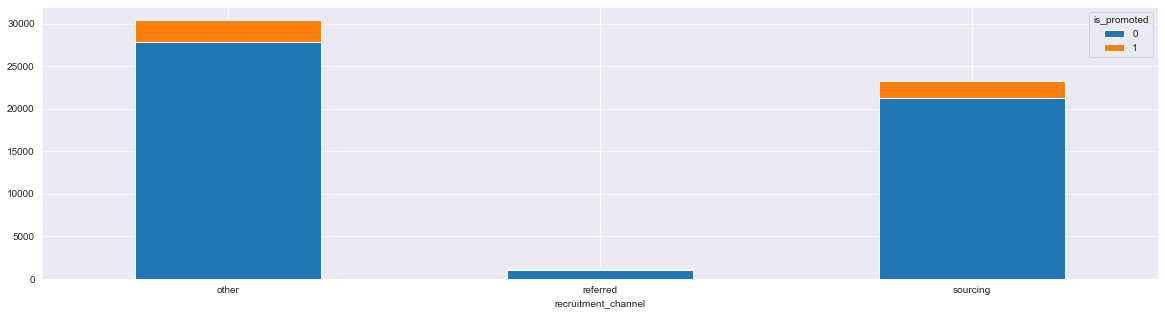

In [34]:
valCounts("recruitment_channel")

Checking null values - Test Set

In [35]:
df_test.recruitment_channel.isnull().sum()

0

### Feature - no_of_trainings

In [36]:
df["no_of_trainings"].isnull().sum()

0

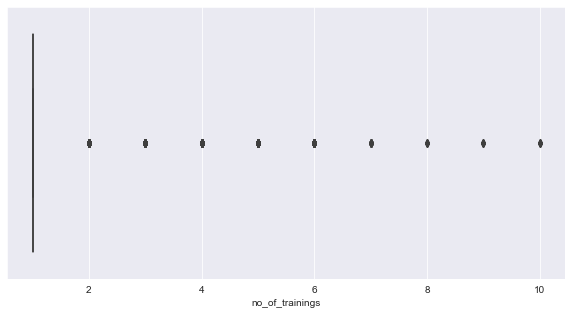

count    54808.000000
mean         1.253011
std          0.609264
min          1.000000
25%          1.000000
50%          1.000000
75%          1.000000
90%          2.000000
95%          2.000000
99%          4.000000
max         10.000000
Name: no_of_trainings, dtype: float64


In [37]:
plt.figure(figsize = (10,5))
sns.boxplot(data = df, x = "no_of_trainings")
plt.show()

print(df["no_of_trainings"].describe(percentiles = (0.25, 0.5, 0.75, 0.9, 0.95, 0.99)))

At least 75% of the entire column has the value of 1. Checking the shape of dataset where there have been multiple trainings i.e. more than 1

In [38]:
df[df["no_of_trainings"] > 1].shape

(10430, 13)

Changing the column to a categorical column where the value is "once" if there has been 1 training, and "multiple" if there has been more than 1 training"

In [39]:
df["no_of_trainings"] = df["no_of_trainings"].apply(lambda x: "once" if x == 1 else "multiple")
df["no_of_trainings"].value_counts(normalize = True) * 100

once        80.969931
multiple    19.030069
Name: no_of_trainings, dtype: float64

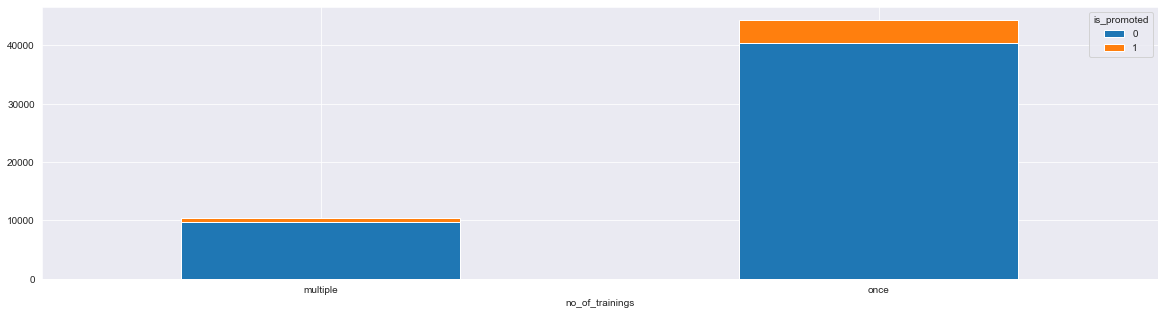

In [40]:
valCounts("no_of_trainings")

Checking null values - Test Set

In [41]:
df_test.no_of_trainings.isnull().sum()

0

Reflecting the changes made to the training dataset to the test dataset

In [42]:
df_test["no_of_trainings"] = df_test["no_of_trainings"].apply(lambda x: "once" if x == 1 else "multiple")
df_test["no_of_trainings"].value_counts(normalize = True) * 100

once        80.57897
multiple    19.42103
Name: no_of_trainings, dtype: float64

### Feature - Age

In [43]:
df["age"].isnull().sum()

0

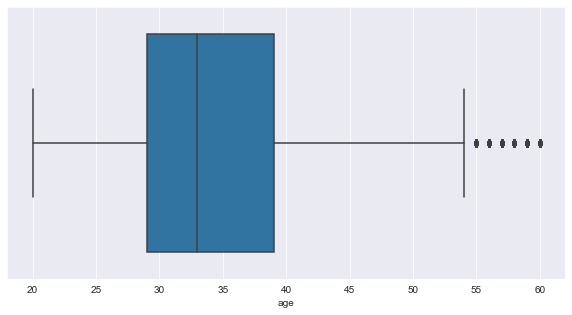

count    54808.000000
mean        34.803915
std          7.660169
min         20.000000
25%         29.000000
50%         33.000000
75%         39.000000
90%         46.000000
95%         51.000000
99%         58.000000
max         60.000000
Name: age, dtype: float64


In [44]:
plt.figure(figsize = (10,5))
sns.boxplot(data = df, x = "age")
plt.show()

print(df["age"].describe(percentiles = (0.25, 0.5, 0.75, 0.9, 0.95, 0.99)))

Checking the number of rows where age is above 51 (since that's the value of the 95th percentile)

In [45]:
df[df["age"] > 51].shape

(2463, 13)

As 2463 rows are the outliers out of 54808 where age is greater than 51 (also the 95th percentile value), capping the values to 51

In [46]:
df["age"][df["age"] > 51] = 51

<AxesSubplot:xlabel='age'>

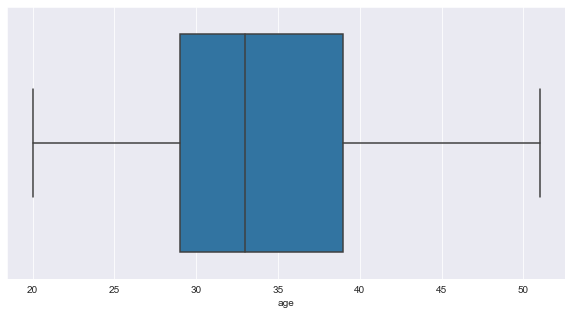

In [47]:
plt.figure(figsize = (10,5))
sns.boxplot(data = df, x = "age")

Now there are no outliers left

<AxesSubplot:xlabel='is_promoted', ylabel='age'>

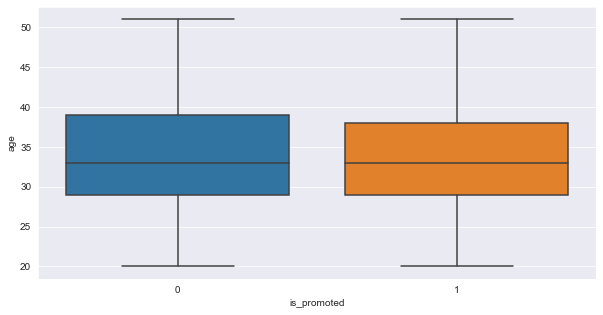

In [48]:
plt.figure(figsize = (10,5))
sns.boxplot(data = df, y = "age", x = "is_promoted")

From above, its visible that age doesn't make a difference for the employee to get promoted

Checking null values - Test Set

In [49]:
df_test.age.isnull().sum()

0

Making the same change as per our training dataset

In [50]:
df_test["age"][df_test["age"] > 51] = 51

### Feature - previous_year_rating

In [51]:
df["previous_year_rating"].isnull().sum()

4124

In [52]:
df["previous_year_rating"].value_counts(normalize = True) * 100

3.0    36.733486
5.0    23.165101
4.0    19.487412
1.0    12.278036
2.0     8.335964
Name: previous_year_rating, dtype: float64

The null values could be for the new starters, for those there have been no previous year ratings. So will check the value counts for length of service for these null values, and if they turn out to be 1, then null values can be imputed to the value of '0' to indicate they haven't been rated yet.

In [53]:
df[df["previous_year_rating"].isnull()]["length_of_service"].value_counts()

1    4124
Name: length_of_service, dtype: int64

Number of null values and length of service being 1 is the same. So imputing the null values to the value of '0'.

In [54]:
df["previous_year_rating"].fillna(0, inplace = True)

In [55]:
df["previous_year_rating"].isnull().sum()

0

<AxesSubplot:ylabel='previous_year_rating'>

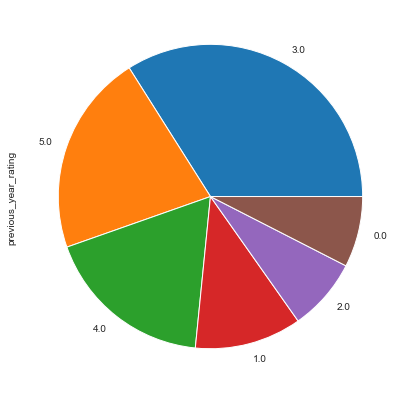

In [56]:
(df["previous_year_rating"].value_counts(normalize = True) * 100).plot(kind = "pie", figsize = (7,7))

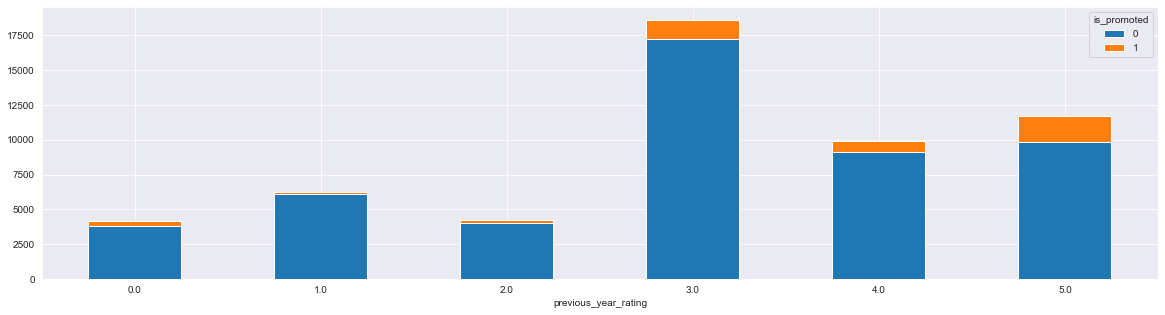

In [57]:
valCounts("previous_year_rating")

Checking null values - Test Set

In [58]:
df_test.previous_year_rating.isnull().sum()

1812

In [59]:
df_test["previous_year_rating"].fillna(0, inplace = True)
df_test.previous_year_rating.isnull().sum()

0

### Feature - length_of_service

In [60]:
df["length_of_service"].isnull().sum()

0

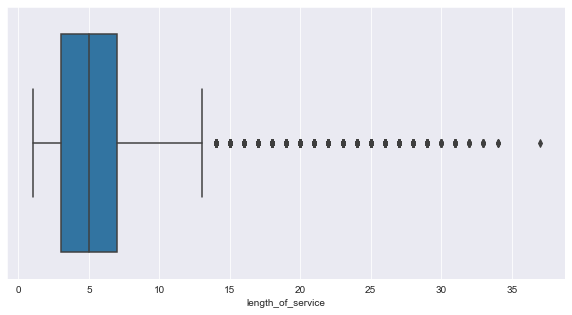

count    54808.000000
mean         5.865512
std          4.265094
min          1.000000
25%          3.000000
50%          5.000000
75%          7.000000
85%          9.000000
90%         11.000000
95%         15.000000
99%         20.000000
max         37.000000
Name: length_of_service, dtype: float64


In [61]:
plt.figure(figsize = (10,5))
sns.boxplot(data = df, x = "length_of_service")
plt.show()

print(df["length_of_service"].describe(percentiles = (0.25, 0.5, 0.75, 0.85, 0.9, 0.95, 0.99)))

Checking the number of rows above 7 years of service (above 75th percentile)

In [62]:
df[df["length_of_service"] > 7].shape

(13591, 13)

Since there are 13591 rows above 7 years of service, will derive a new column "above_7_year_service", for which the value will be 1 if the employee has been employed for more than 7 years, else 0.

In [63]:
df["above_7_year_service"] = np.where(df["length_of_service"] > 7, 1, 0)

<AxesSubplot:ylabel='above_7_year_service'>

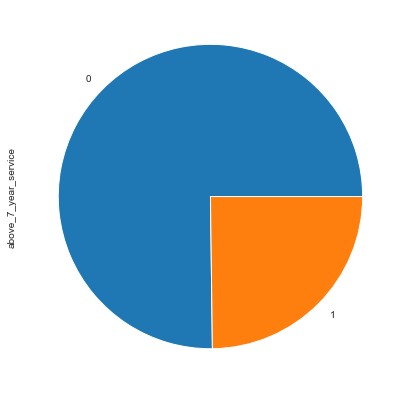

In [64]:
(df["above_7_year_service"].value_counts(normalize = True) * 100).plot(kind = "pie", figsize = (7,7))

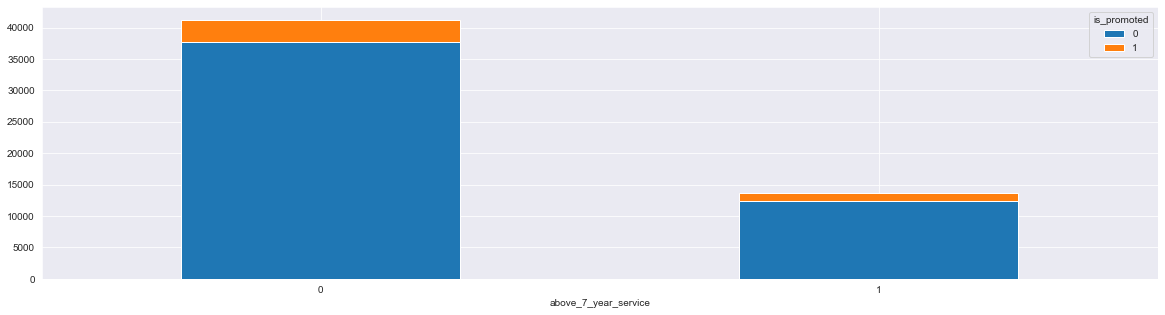

In [65]:
valCounts("above_7_year_service")

Dropping "length_of_service" as its not required for the analysis anymore.

In [66]:
df.drop("length_of_service", axis = 1, inplace = True)
df.head()

,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,KPIs_met >80%,awards_won?,avg_training_score,is_promoted,above_7_year_service
0,Sales & Marketing,region_7,Others,f,sourcing,once,35,5.0,1,0,49,0,1
1,Operations,region_22,Bachelor's,m,other,once,30,5.0,0,0,60,0,0
2,Sales & Marketing,region_19,Bachelor's,m,sourcing,once,34,3.0,0,0,50,0,0
3,Sales & Marketing,region_23,Bachelor's,m,other,multiple,39,1.0,0,0,50,0,1
4,Technology,region_26,Bachelor's,m,other,once,45,3.0,0,0,73,0,0


Checking null values - Test Set

In [67]:
df_test.length_of_service.isnull().sum()

0

Reflecting same changes to this feature as done for the training set

In [68]:
df_test["above_7_year_service"] = np.where(df_test["length_of_service"] > 7, 1, 0)

In [69]:
df_test.drop("length_of_service", axis = 1, inplace = True)
df_test.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,KPIs_met >80%,awards_won?,avg_training_score,above_7_year_service
0,8724,Technology,region_26,Bachelor's,m,sourcing,once,24,0.0,1,0,77,0
1,74430,HR,region_4,Bachelor's,f,other,once,31,3.0,0,0,51,0
2,72255,Sales & Marketing,region_13,Bachelor's,m,other,once,31,1.0,0,0,47,0
3,38562,Procurement,region_2,Bachelor's,f,other,multiple,31,2.0,0,0,65,1
4,64486,Finance,region_29,Bachelor's,m,sourcing,once,30,4.0,0,0,61,0


#### Feature - KPIs_met >80%

In [70]:
df["KPIs_met >80%"].isnull().sum()

0

In [71]:
df["KPIs_met >80%"].value_counts(normalize = True) * 100

0    64.802584
1    35.197416
Name: KPIs_met >80%, dtype: float64

<AxesSubplot:ylabel='KPIs_met >80%'>

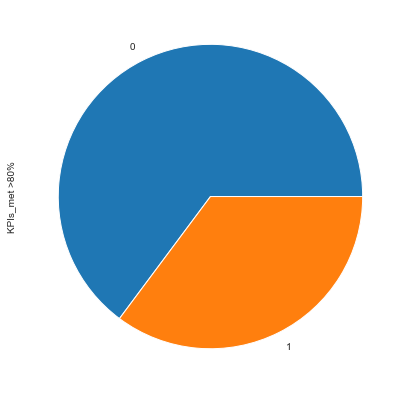

In [72]:
(df["KPIs_met >80%"].value_counts(normalize = True) * 100).plot(kind = "pie", figsize = (7,7))

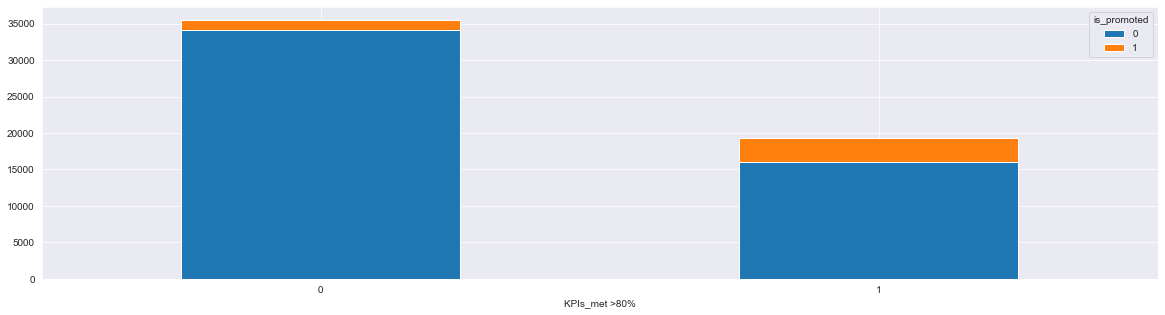

In [73]:
valCounts("KPIs_met >80%")

Checking null values - Test Set

In [74]:
df_test["KPIs_met >80%"].isnull().sum()

0

### Feature - awards_won?

In [75]:
df["awards_won?"].isnull().sum()

0

In [76]:
df["awards_won?"].value_counts(normalize = True) * 100

0    97.68282
1     2.31718
Name: awards_won?, dtype: float64

This feature is highly skwewed as only 2% of the employees have been awarded. Hence dropping this highly skewed feature

In [77]:
df.drop("awards_won?", axis = 1, inplace = True)
df.head()

,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,KPIs_met >80%,avg_training_score,is_promoted,above_7_year_service
0,Sales & Marketing,region_7,Others,f,sourcing,once,35,5.0,1,49,0,1
1,Operations,region_22,Bachelor's,m,other,once,30,5.0,0,60,0,0
2,Sales & Marketing,region_19,Bachelor's,m,sourcing,once,34,3.0,0,50,0,0
3,Sales & Marketing,region_23,Bachelor's,m,other,multiple,39,1.0,0,50,0,1
4,Technology,region_26,Bachelor's,m,other,once,45,3.0,0,73,0,0


Test Set

In [78]:
df_test.drop("awards_won?", axis = 1, inplace = True)
df_test.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,KPIs_met >80%,avg_training_score,above_7_year_service
0,8724,Technology,region_26,Bachelor's,m,sourcing,once,24,0.0,1,77,0
1,74430,HR,region_4,Bachelor's,f,other,once,31,3.0,0,51,0
2,72255,Sales & Marketing,region_13,Bachelor's,m,other,once,31,1.0,0,47,0
3,38562,Procurement,region_2,Bachelor's,f,other,multiple,31,2.0,0,65,1
4,64486,Finance,region_29,Bachelor's,m,sourcing,once,30,4.0,0,61,0


### Feature - avg_training_score

In [79]:
df["avg_training_score"].isnull().sum()

0

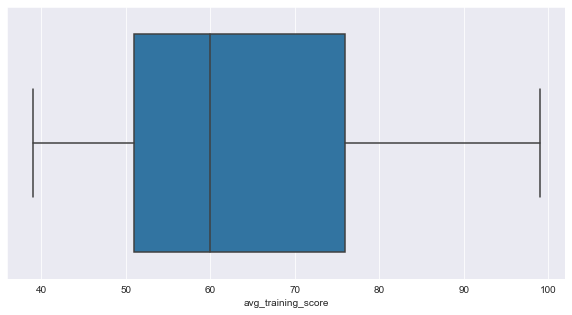

count    54808.000000
mean        63.386750
std         13.371559
min         39.000000
25%         51.000000
50%         60.000000
75%         76.000000
90%         83.000000
95%         86.000000
99%         91.000000
max         99.000000
Name: avg_training_score, dtype: float64


In [80]:
plt.figure(figsize = (10,5))
sns.boxplot(data = df, x = "avg_training_score")
plt.show()

print(df["avg_training_score"].describe(percentiles = (0.25, 0.5, 0.75, 0.9, 0.95, 0.99)))

This feature will remain as it is as no outliers exist for this feature

<AxesSubplot:xlabel='is_promoted', ylabel='avg_training_score'>

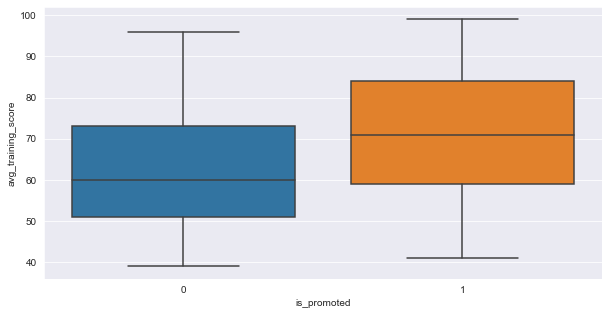

In [81]:
plt.figure(figsize = (10,5))
sns.boxplot(data = df, y = "avg_training_score", x = "is_promoted")

Checking null values - Test Set

In [82]:
df_test["avg_training_score"].isnull().sum()

0

## Final Check for df and df_test

In [83]:
df.head()

,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,KPIs_met >80%,avg_training_score,is_promoted,above_7_year_service
0,Sales & Marketing,region_7,Others,f,sourcing,once,35,5.0,1,49,0,1
1,Operations,region_22,Bachelor's,m,other,once,30,5.0,0,60,0,0
2,Sales & Marketing,region_19,Bachelor's,m,sourcing,once,34,3.0,0,50,0,0
3,Sales & Marketing,region_23,Bachelor's,m,other,multiple,39,1.0,0,50,0,1
4,Technology,region_26,Bachelor's,m,other,once,45,3.0,0,73,0,0


In [84]:
df_test.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,KPIs_met >80%,avg_training_score,above_7_year_service
0,8724,Technology,region_26,Bachelor's,m,sourcing,once,24,0.0,1,77,0
1,74430,HR,region_4,Bachelor's,f,other,once,31,3.0,0,51,0
2,72255,Sales & Marketing,region_13,Bachelor's,m,other,once,31,1.0,0,47,0
3,38562,Procurement,region_2,Bachelor's,f,other,multiple,31,2.0,0,65,1
4,64486,Finance,region_29,Bachelor's,m,sourcing,once,30,4.0,0,61,0


In [85]:
df.isnull().sum()

department              0
region                  0
education               0
gender                  0
recruitment_channel     0
no_of_trainings         0
age                     0
previous_year_rating    0
KPIs_met >80%           0
avg_training_score      0
is_promoted             0
above_7_year_service    0
dtype: int64

In [86]:
df_test.isnull().sum()

employee_id             0
department              0
region                  0
education               0
gender                  0
recruitment_channel     0
no_of_trainings         0
age                     0
previous_year_rating    0
KPIs_met >80%           0
avg_training_score      0
above_7_year_service    0
dtype: int64

Training and Test dataset have the same features that's required for analysis and there are no more missing values in either of the datasets.

### Looking at just the numerical variables

<Figure size 1080x1080 with 0 Axes>

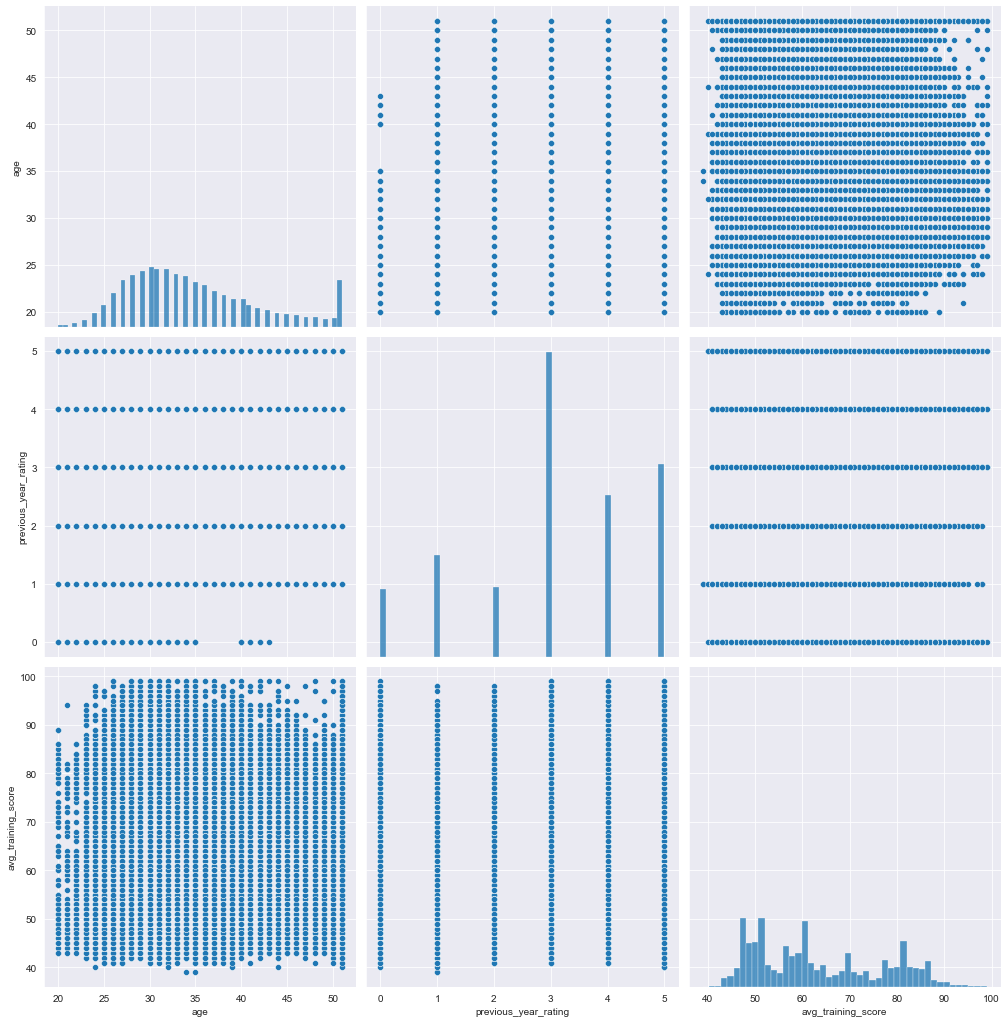

In [87]:
plt.figure(figsize = (15,15))
plot = sns.pairplot(df[["age","previous_year_rating","avg_training_score"]])
plot.fig.set_size_inches(15,15)
plt.show()

## Target Imbalance Check - is_promoted

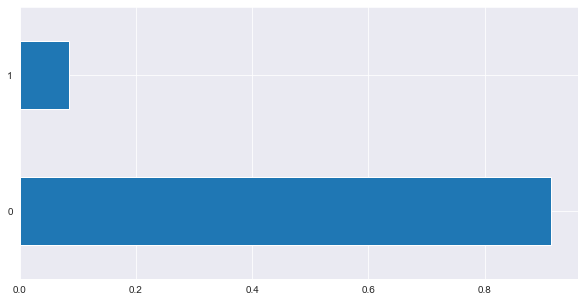

In [88]:
df["is_promoted"].value_counts(normalize =  True).plot(kind = "barh", figsize = (10,5))
plt.show()

In [89]:
df["is_promoted"].value_counts(normalize =  True) * 100

0    91.482995
1     8.517005
Name: is_promoted, dtype: float64

There is a huge imbalance in our target, will use "class_weight" in our model(s) to balance the target variable.

## Data Preparation

### Dummy Variables

Concatinating the training and testing datasets so that the dummy variables are created for the same columns and the same columns are dropped using "drop_first" command. Once the new features have been created, will split training and testing datasets.

To do this successfully, saving the number of rows in a variable for the training dataset, and then will split until that row for the training.

In [90]:
train_objs_num = len(df)

concatDF = pd.concat(objs=[df, df_test], axis=0)
concatDF.head()

,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,KPIs_met >80%,avg_training_score,is_promoted,above_7_year_service,employee_id
0,Sales & Marketing,region_7,Others,f,sourcing,once,35,5.0,1,49,0.0,1,NaN
1,Operations,region_22,Bachelor's,m,other,once,30,5.0,0,60,0.0,0,NaN
2,Sales & Marketing,region_19,Bachelor's,m,sourcing,once,34,3.0,0,50,0.0,0,NaN
3,Sales & Marketing,region_23,Bachelor's,m,other,multiple,39,1.0,0,50,0.0,1,NaN
4,Technology,region_26,Bachelor's,m,other,once,45,3.0,0,73,0.0,0,NaN


In [91]:
# Department Dummy
dummy1 = pd.get_dummies(concatDF["department"], prefix = "department", drop_first = True)
concatDF.drop("department", axis = 1, inplace = True)
concatDF = pd.concat([concatDF,dummy1], axis = 1)


# Region Dummy
dummy2 = pd.get_dummies(concatDF["region"], drop_first = True)
concatDF.drop("region", axis = 1, inplace = True)
concatDF = pd.concat([concatDF,dummy2], axis = 1)


# Education Dummy
dummy3 = pd.get_dummies(concatDF["education"], prefix = "education", drop_first = True)
concatDF.drop("education", axis = 1, inplace = True)
concatDF = pd.concat([concatDF,dummy3], axis = 1)


# Gender Dummy
dummy4 = pd.get_dummies(concatDF["gender"], prefix = "gender", drop_first = True)
concatDF.drop("gender", axis = 1, inplace = True)
concatDF = pd.concat([concatDF,dummy4], axis = 1)


# Recruitment Channel Dummy
dummy5 = pd.get_dummies(concatDF["recruitment_channel"], prefix = "recruitment_channel", drop_first = True)
concatDF.drop("recruitment_channel", axis = 1, inplace = True)
concatDF = pd.concat([concatDF,dummy5], axis = 1)


# no_of_trainings Dummy
dummy6 = pd.get_dummies(concatDF["no_of_trainings"], prefix = "no_of_trainings", drop_first = True)
concatDF.drop("no_of_trainings", axis = 1, inplace = True)
concatDF = pd.concat([concatDF,dummy6], axis = 1)

concatDF.head()

,age,previous_year_rating,KPIs_met >80%,avg_training_score,is_promoted,above_7_year_service,employee_id,department_Finance,department_HR,department_Legal,department_Operations,department_Procurement,department_R&D,department_Sales & Marketing,department_Technology,region_10,region_11,region_12,region_13,region_14,region_15,region_16,region_17,region_18,region_19,region_2,region_20,region_21,region_22,region_23,region_24,region_25,region_26,region_27,region_28,region_29,region_3,region_30,region_31,region_32,region_33,region_34,region_4,region_5,region_6,region_7,region_8,region_9,education_Others,gender_m,recruitment_channel_referred,recruitment_channel_sourcing,no_of_trainings_once
0,35,5.0,1,49,0.0,1,NaN,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,1
1,30,5.0,0,60,0.0,0,NaN,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1
2,34,3.0,0,50,0.0,0,NaN,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,1
3,39,1.0,0,50,0.0,1,NaN,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
4,45,3.0,0,73,0.0,0,NaN,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1


In [92]:
train_preprocessed = concatDF[:train_objs_num]
test_preprocessed = concatDF[train_objs_num:]

In [93]:
train_preprocessed.drop("employee_id", axis = 1, inplace = True)
train_preprocessed.head()

,age,previous_year_rating,KPIs_met >80%,avg_training_score,is_promoted,above_7_year_service,department_Finance,department_HR,department_Legal,department_Operations,department_Procurement,department_R&D,department_Sales & Marketing,department_Technology,region_10,region_11,region_12,region_13,region_14,region_15,region_16,region_17,region_18,region_19,region_2,region_20,region_21,region_22,region_23,region_24,region_25,region_26,region_27,region_28,region_29,region_3,region_30,region_31,region_32,region_33,region_34,region_4,region_5,region_6,region_7,region_8,region_9,education_Others,gender_m,recruitment_channel_referred,recruitment_channel_sourcing,no_of_trainings_once
0,35,5.0,1,49,0.0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,1
1,30,5.0,0,60,0.0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1
2,34,3.0,0,50,0.0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,1
3,39,1.0,0,50,0.0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
4,45,3.0,0,73,0.0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1


In [94]:
train_preprocessed.shape

(54808, 52)

In [95]:
train_preprocessed.isnull().any()

age                             False
previous_year_rating            False
KPIs_met >80%                   False
avg_training_score              False
is_promoted                     False
above_7_year_service            False
department_Finance              False
department_HR                   False
department_Legal                False
department_Operations           False
department_Procurement          False
department_R&D                  False
department_Sales & Marketing    False
department_Technology           False
region_10                       False
region_11                       False
region_12                       False
region_13                       False
region_14                       False
region_15                       False
region_16                       False
region_17                       False
region_18                       False
region_19                       False
region_2                        False
region_20                       False
region_21   

In [96]:
test_preprocessed.drop("is_promoted", axis = 1, inplace = True)
test_preprocessed.head()

,age,previous_year_rating,KPIs_met >80%,avg_training_score,above_7_year_service,employee_id,department_Finance,department_HR,department_Legal,department_Operations,department_Procurement,department_R&D,department_Sales & Marketing,department_Technology,region_10,region_11,region_12,region_13,region_14,region_15,region_16,region_17,region_18,region_19,region_2,region_20,region_21,region_22,region_23,region_24,region_25,region_26,region_27,region_28,region_29,region_3,region_30,region_31,region_32,region_33,region_34,region_4,region_5,region_6,region_7,region_8,region_9,education_Others,gender_m,recruitment_channel_referred,recruitment_channel_sourcing,no_of_trainings_once
0,24,0.0,1,77,0,8724.0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,1
1,31,3.0,0,51,0,74430.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1
2,31,1.0,0,47,0,72255.0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1
3,31,2.0,0,65,1,38562.0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,30,4.0,0,61,0,64486.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,1


In [97]:
test_preprocessed.shape

(23490, 52)

In [98]:
test_preprocessed.isnull().any()

age                             False
previous_year_rating            False
KPIs_met >80%                   False
avg_training_score              False
above_7_year_service            False
employee_id                     False
department_Finance              False
department_HR                   False
department_Legal                False
department_Operations           False
department_Procurement          False
department_R&D                  False
department_Sales & Marketing    False
department_Technology           False
region_10                       False
region_11                       False
region_12                       False
region_13                       False
region_14                       False
region_15                       False
region_16                       False
region_17                       False
region_18                       False
region_19                       False
region_2                        False
region_20                       False
region_21   

### Train-Test Split

In [99]:
X = train_preprocessed.drop("is_promoted", axis = 1)
y = train_preprocessed["is_promoted"]

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.7, test_size = 0.3, random_state = 42)

In [100]:
X_train.head()

,age,previous_year_rating,KPIs_met >80%,avg_training_score,above_7_year_service,department_Finance,department_HR,department_Legal,department_Operations,department_Procurement,department_R&D,department_Sales & Marketing,department_Technology,region_10,region_11,region_12,region_13,region_14,region_15,region_16,region_17,region_18,region_19,region_2,region_20,region_21,region_22,region_23,region_24,region_25,region_26,region_27,region_28,region_29,region_3,region_30,region_31,region_32,region_33,region_34,region_4,region_5,region_6,region_7,region_8,region_9,education_Others,gender_m,recruitment_channel_referred,recruitment_channel_sourcing,no_of_trainings_once
3113,26,2.0,0,77,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
118,27,4.0,1,72,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
17005,34,3.0,1,56,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
14505,40,5.0,1,83,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0
31487,45,3.0,0,68,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1


In [101]:
X_test.head()

,age,previous_year_rating,KPIs_met >80%,avg_training_score,above_7_year_service,department_Finance,department_HR,department_Legal,department_Operations,department_Procurement,department_R&D,department_Sales & Marketing,department_Technology,region_10,region_11,region_12,region_13,region_14,region_15,region_16,region_17,region_18,region_19,region_2,region_20,region_21,region_22,region_23,region_24,region_25,region_26,region_27,region_28,region_29,region_3,region_30,region_31,region_32,region_33,region_34,region_4,region_5,region_6,region_7,region_8,region_9,education_Others,gender_m,recruitment_channel_referred,recruitment_channel_sourcing,no_of_trainings_once
40907,35,5.0,0,47,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1
51939,33,1.0,0,51,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0
6978,38,3.0,0,64,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
12814,33,1.0,0,56,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
22921,37,1.0,0,80,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1


In [102]:
y_train.head()

3113     0.0
118      1.0
17005    0.0
14505    0.0
31487    0.0
Name: is_promoted, dtype: float64

In [103]:
y_test.head()

40907    0.0
51939    0.0
6978     0.0
12814    0.0
22921    0.0
Name: is_promoted, dtype: float64

## Model Building

### Weight of Class

Since the target variable is highly skewed, instead of using "class_weight = balance", will calculate class weights manually in order to fit the training model

In [104]:
n_samples = len(train_preprocessed)
n_classes = train_preprocessed["is_promoted"].nunique()
n_sample0 = len(train_preprocessed[train_preprocessed["is_promoted"] == 0])
n_sample1 = len(train_preprocessed[train_preprocessed["is_promoted"] == 1])

print("n_samples : " + str(n_samples))
print("n_classes : " + str(n_classes))
print("n_sample0 : " + str(n_sample0))
print("n_sample1 : " + str(n_sample1))

n_samples : 54808
n_classes : 2
n_sample0 : 50140
n_sample1 : 4668


In [105]:
w0 = n_samples/(n_classes*n_sample0) # Weight of class 0
w1 = n_samples/(n_classes*n_sample1) # Weight of class 1

print("Weight of class 0 : " + str(w0))
print("Weight of class 1 : " + str(w1))

Weight of class 0 : 0.5465496609493419
Weight of class 1 : 5.8706083976006855


### Random Forest

Creating a Random Forest model first. Using GridSearchCV to find the best parameters for this dataset.

In [106]:
rf = RandomForestClassifier(random_state = 42, class_weight={0:w0,1:w1}, n_jobs = -1)

params = {"max_depth" : [5, 7, 10, 15, 20, 25, 30, 40, 50],
         "min_samples_leaf" : [5, 10, 15, 20, 40, 50, 100, 200, 500, 1000],
         "criterion": ["gini","entropy"],
         "n_estimators" : [10, 15, 20, 40, 50, 75, 100],
         "max_features" : ["auto", "sqrt","log2"]}


grid_search = GridSearchCV(estimator = rf,
                          param_grid = params,
                          cv = 4,
                          n_jobs = -1,
                          verbose = 1,
                          scoring = "accuracy")

Fitting the model

In [107]:
%%time
grid_search.fit(X_train, y_train)

Fitting 4 folds for each of 3780 candidates, totalling 15120 fits
Wall time: 24min 34s


GridSearchCV(cv=4,
             estimator=RandomForestClassifier(class_weight={0: 0.5465496609493419,
                                                            1: 5.8706083976006855},
                                              n_jobs=-1, random_state=42),
             n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [5, 7, 10, 15, 20, 25, 30, 40, 50],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_leaf': [5, 10, 15, 20, 40, 50, 100, 200,
                                              500, 1000],
                         'n_estimators': [10, 15, 20, 40, 50, 75, 100]},
             scoring='accuracy', verbose=1)

Checking the best score out of the above mentioned hyperparameters

In [108]:
grid_search.best_score_

0.8304183048745395

Getting the best estimator

In [109]:
rf_best = grid_search.best_estimator_
rf_best

RandomForestClassifier(class_weight={0: 0.5465496609493419,
                                     1: 5.8706083976006855},
                       max_depth=40, min_samples_leaf=5, n_jobs=-1,
                       random_state=42)

Plotting ROC Curve

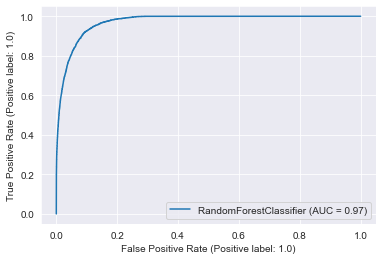

In [110]:
plot_roc_curve(rf_best, X_train, y_train)
plt.show()

Predicting X_train using the best estimator

In [111]:
y_pred = rf_best.predict(X_train)

Creating a confusion matrix

In [112]:
metrics.confusion_matrix(y_train, y_pred)

array([[30208,  4822],
       [  140,  3195]], dtype=int64)

In [113]:
y_train.value_counts()

0.0    35030
1.0     3335
Name: is_promoted, dtype: int64

Checking the Precision, Recall, Fscore and Support of the predicted value

In [114]:
precision, recall, fscore, support = score(y_train, y_pred)

print('precision: {}'.format(precision))
print('recall: {}'.format(recall))
print('fscore: {}'.format(fscore))
print('support: {}'.format(support))

precision: [0.99538685 0.39852813]
recall: [0.86234656 0.95802099]
fscore: [0.92410291 0.56289641]
support: [35030  3335]


Predicting X_test dataset

In [115]:
y_pred_test = rf_best.predict(X_test)

In [116]:
metrics.confusion_matrix(y_test, y_pred_test)

array([[12721,  2389],
       [  395,   938]], dtype=int64)

Checking the Precision, Recall, Fscore and Support of the predicted value

In [117]:
precision, recall, fscore, support = score(y_test, y_pred_test)

print('precision: {}'.format(precision))
print('recall: {}'.format(recall))
print('fscore: {}'.format(fscore))
print('support: {}'.format(support))

precision: [0.96988411 0.28193568]
recall: [0.84189279 0.70367592]
fscore: [0.90136753 0.40257511]
support: [15110  1333]


#### Creating a dataframe for submission of the test data file

Adding the employee ID to the submission file, dropping employee_id from the test dataset to predict based on the same features as the training dataset

In [118]:
submission = test_preprocessed[["employee_id"]]
test_preprocessed.drop("employee_id", axis = 1, inplace = True)
submission.head()

,employee_id
0,8724.0
1,74430.0
2,72255.0
3,38562.0
4,64486.0


Adding a new column "is_promoted" based on the Random Forest Model Prediction

In [119]:
submission["is_promoted"] = rf_best.predict(test_preprocessed)

In [120]:
submission.head()

,employee_id,is_promoted
0,8724.0,0.0
1,74430.0,0.0
2,72255.0,0.0
3,38562.0,0.0
4,64486.0,0.0


In [121]:
submission = submission.round(decimals=0).astype(np.int64)
submission.head()

,employee_id,is_promoted
0,8724,0
1,74430,0
2,72255,0
3,38562,0
4,64486,0


Saving the dataframe to a csv file for submission to Analytics Vidhya

In [122]:
filename = 'submission_rf.csv'
submission.to_csv(filename, index=False)

### XG_Boost

2nd model being created is using XG_Boost. Using GridSearchCV to find the best parameters for this dataset.

In [125]:
xgb_model = xgb.XGBClassifier(scale_pos_weight = (n_sample0/n_sample1) , use_label_encoder =False)

parameters = {'learning_rate': [0.1, 0.2, 0.3, 0.4, 0.5], 
              'max_depth': [6, 8, 10, 15, 20],
              'min_child_weight': [10, 20, 25, 50, 100],
              'n_estimators': [50, 100, 150, 200, 300, 500],
             'eval_metric':['error']}

scorer = metrics.make_scorer(metrics.roc_auc_score,
                             greater_is_better=True,
                             needs_proba=True,
                             needs_threshold=False)

clf_xgb = GridSearchCV(estimator = xgb_model,
                       param_grid = parameters, 
                       n_jobs=-1, cv=4, 
                       scoring = scorer, 
                       verbose = 1, 
                       refit=True)


Fitting the model

In [126]:
%%time
clf_xgb.fit(X_train, y_train)

Fitting 4 folds for each of 750 candidates, totalling 3000 fits
Wall time: 2h 27min 44s


GridSearchCV(cv=4,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, gamma=None,
                                     gpu_id=None, importance_type='gain',
                                     interaction_constraints=None,
                                     learning_rate=None, max_delta_step=None,
                                     max_depth=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs...
                                     scale_pos_weight=10.741216795201371,
                                     subsample=None, tree_method=None,
                                     use_label_encoder=False,
                                     validate_parameters=None, verbosity=Non

Checking the best score out of the above mentioned hyperparameters

In [128]:
clf_xgb.best_score_

0.9051888275163977

Checking the best estimator

In [130]:
xgb_best = clf_xgb.best_estimator_
xgb_best

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, eval_metric='error',
              gamma=0, gpu_id=-1, importance_type='gain',
              interaction_constraints='', learning_rate=0.1, max_delta_step=0,
              max_depth=6, min_child_weight=10, missing=nan,
              monotone_constraints='()', n_estimators=150, n_jobs=6,
              num_parallel_tree=1, random_state=0, reg_alpha=0, reg_lambda=1,
              scale_pos_weight=10.741216795201371, subsample=1,
              tree_method='exact', use_label_encoder=False,
              validate_parameters=1, verbosity=None)

Plotting ROC Curve

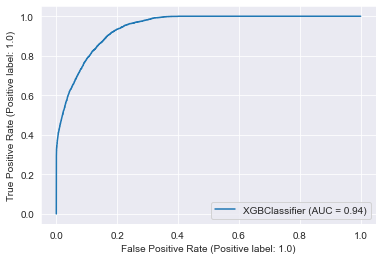

In [131]:
plot_roc_curve(xgb_best, X_train, y_train)
plt.show()

Predicting X_train using the best estimator of XGB_Boost Algorithm and Creating a confusion matrix

In [132]:
y_pred_xgb = xgb_best.predict(X_train)
metrics.confusion_matrix(y_train, y_pred_xgb)

array([[27245,  7785],
       [  163,  3172]], dtype=int64)

Checking the Precision, Recall, Fscore and Support of the predicted value

In [135]:
precision, recall, fscore, support = score(y_train, y_pred_xgb)

print('precision: {}'.format(precision))
print('recall: {}'.format(recall))
print('fscore: {}'.format(fscore))
print('support: {}'.format(support))

precision: [0.99405283 0.2894953 ]
recall: [0.77776192 0.95112444]
fscore: [0.87270572 0.44388469]
support: [35030  3335]


Predicting X_test dataset

In [136]:
y_pred_test = xgb_best.predict(X_test)
metrics.confusion_matrix(y_test, y_pred_test)

array([[11632,  3478],
       [  195,  1138]], dtype=int64)

Checking the Precision, Recall, Fscore and Support of the predicted value

In [137]:
precision, recall, fscore, support = score(y_test, y_pred_test)

print('precision: {}'.format(precision))
print('recall: {}'.format(recall))
print('fscore: {}'.format(fscore))
print('support: {}'.format(support))

precision: [0.9835123 0.2465338]
recall: [0.76982131 0.85371343]
fscore: [0.8636448  0.38258531]
support: [15110  1333]


#### Dataframe for Submission of the test data file

Using the same submission dataframe as before as it already contains the employee_id. Dropping "is_promoted" as those are the predicted values from the Random Forest model. Predicting the dataset using XG_Boost and creating the column again with new values for submission of the test dataset.

In [141]:
submission.drop("is_promoted", axis =1, inplace = True)
submission["is_promoted"] = xgb_best.predict(test_preprocessed)

In [143]:
submission.head()

,employee_id,is_promoted
0,8724,1
1,74430,0
2,72255,0
3,38562,0
4,64486,0


Saving the dataframe to a csv file for submission to Analytics Vidhya

In [144]:
filename = 'submission_xgb.csv'
submission.to_csv(filename, index=False)

## Final Remarks

- Sales & Marketing and Operations Department has the most promotions in the company compared to other departments.
- Very few employees took multiple training sessions. There were more poeople who were promoted after just 1 training session.
- Age is not one of the decision makers in what employee gets promoted
- Employees who had a previous year rating of 5 out of 5 had the most promotions, whereas almost no employee who rated 1 or 2 out of 5 got prommoted
- Employee who met their KPI's above 80% were more likely to get promoted, even though most employees did not meet their KPI's above 80%.
- Random Forest Model :
    - Score of 83%
    - F1 score (Training Dataset) - 0.56
    - F1 score (Test Dataset) - 0.4
    - F1 score (Unseen Submission Dataset) - 0.418 (public score)
- XG Boost Model :
    - Score of 90.51%
    - F1 score (Training Dataset) - 0.44
    - F1 score (Test Dataset) - 0.38
    - F1 score (Unseen Submission Dataset) - 0.38 (public score)
- Final model would be created using Random Forest as the performance was much better compared to XG Boost, and Random Forest model was also computationally less expensive and less time consuming.